# The goal of this is to learn and explain how to conduct Principal Component Analysis(PCA) using a real dataset.

In [2]:
import numpy as np
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
import pandas as pd 
from astropy.table import Table
%matplotlib inline

## From Astroquery Classcode

In [4]:
from astroquery.vizier import Vizier
from astropy import coordinates
import astropy.units as u
from astropy.table import QTable

from astropy.coordinates import ICRS
from astropy import units as u
coo = ICRS(9.8286667 *u.degree, -57.5175000*u.degree)


vquery = Vizier(columns=['**'], row_limit=50)
catalog = vquery.query_region(coo, radius='0d15m0s', catalog='40A/data3')[0]
print(catalog)

   _r       RAJ2000       DEJ2000    ... iIsoFl zIsoFl YIsoFl
              deg           deg      ...                     
-------- ------------- ------------- ... ------ ------ ------
0.242644   9.884961000 -57.758264000 ...      0      0      0
0.244365   9.884991000 -57.759996000 ...      0      0      0
0.246866   9.883333000 -57.762624000 ...      0      0      0
0.245320   9.874475000 -57.761590000 ...      0      0      0
0.245540   9.879033000 -57.761554000 ...      0      0      0
0.246044   9.886027000 -57.761619000 ...      0      0      0
0.246289   9.879897000 -57.762256000 ...      0      0      0
0.246035   9.873203000 -57.762376000 ...      0      0      0
0.246867   9.876723000 -57.763022000 ...      0      0      0
     ...           ...           ... ...    ...    ...    ...
0.245908   9.927711000 -57.757623000 ...      0      0      0
0.244317   9.920744000 -57.756792000 ...      0      0      0
0.247973   9.937396000 -57.758545000 ...      0      0      0
0.248004

## Reading CSV using Rianne Data

In [6]:
# From HWK 4

df = pd.read_csv("spectral_data.csv")
 
df.head(10)

,specobjid,SOURCETYPE,RA,Dec,plate,ra,dec,objid,run,rerun,...,fiberID,run2d,wavelength,flux,g sn,r sn,i sn,red shift,red shift error,central wavelength
0,300633718924535808,GALAXY,149.11249,0.129730,267,149.112540,0.129711,1237651801233686759,1473,301,...,67,26,[3.5799 3.58 3.5801 ... 3.964 3.9641 3.9642],[ 3.3858166 6.757945 14.171655 ... 20.71286...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
1,300637017459419136,GALAXY,149.01061,0.139739,267,149.010627,0.139731,1237651801233686675,1473,301,...,79,26,[3.5797 3.5798 3.5799 ... 3.9639 3.964 3.9641],[ 3.636065 11.513229 10.353952 ... 24.920021 2...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
2,300657083546626048,GALAXY,148.72889,0.188859,267,148.728878,0.188860,1237651801233555601,1473,301,...,152,26,[3.5792 3.5793 3.5794 ... 3.9633 3.9634 3.9635],[10.337443 5.252039 0.16828395 ... 7.90...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
3,300658183058253824,GALAXY,148.60004,0.129170,267,148.600084,0.129176,1237651801233490073,1473,301,...,156,26,[3.5792 3.5793 3.5794 ... 3.9633 3.9634 3.9635],[ 6.432421 3.1282418 -0.17489086 ... 13.31...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
4,300663405738485760,GALAXY,148.28257,0.048570,267,148.282558,0.048585,1237650796220907786,1239,301,...,175,26,[3.5792 3.5793 3.5794 ... 3.9282 3.9283 3.9284],[-2.1444824 2.9741857 8.091346 ... 7.14049...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
5,300670277686159360,GALAXY,147.77579,0.054116,267,147.775787,0.054133,1237650796220711116,1239,301,...,200,26,[3.5795 3.5796 3.5797 ... 3.9631 3.9632 3.9633],[ 2.696887 -4.3321786 3.0716033 ... 5.17119...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
6,300688419628017664,GALAXY,147.51706,0.044129,267,147.517043,0.044124,1237650796220580155,1239,301,...,266,26,[3.5809 3.581 3.5811 ... 3.9629 3.963 3.9631],[ 3.9057949 -2.1700828 -1.143463 ... 10.84592...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
7,300710684738480128,QSO,147.17010,0.539087,267,147.169954,0.539067,1237651801769705923,1473,301,...,347,26,[3.5814 3.5815 3.5816 ... 3.9643 3.9644 3.9645],[18.498877 9.25427 14.624103 ... 2.50898...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
8,300710959616387072,GALAXY,146.77290,0.701158,267,146.772936,0.701145,1237648722289951090,756,301,...,348,26,[3.5814 3.5815 3.5816 ... 3.9643 3.9644 3.9645],[2.0430536 1.9300419 3.8205187 ... 0.9385399 1...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
9,300720030587316224,GALAXY,147.53905,0.597599,267,147.538965,0.597571,1237651801769902317,1473,301,...,381,26,[3.5805 3.5806 3.5807 ... 3.9643 3.9644 3.9645],[ 9.655294 5.953058 10.714488 ... 15.609342 1...,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791


In [7]:
df.drop(['RA','Dec', 'plate', 'ra', 'dec', 'objid', 'run', 'rerun', 'camcol', 'mjd', 'fiberID', 'run2d', 'wavelength', 'flux' ], axis=1, inplace=True)


In [8]:
df

,specobjid,SOURCETYPE,field,z,g sn,r sn,i sn,red shift,red shift error,central wavelength
0,300633718924535808,GALAXY,40,0.045786,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
1,300637017459419136,GALAXY,40,0.074574,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
2,300657083546626048,GALAXY,38,0.094445,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
3,300658183058253824,GALAXY,37,0.150916,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
4,300663405738485760,GALAXY,186,0.145771,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
5,300670277686159360,GALAXY,183,0.080205,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
6,300688419628017664,GALAXY,181,0.317404,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
7,300710684738480128,QSO,27,2.243463,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
8,300710959616387072,GALAXY,207,0.030389,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
9,300720030587316224,GALAXY,30,0.080721,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791


In [9]:
X = df.iloc[:, 2:10]
y = df.iloc[:, 1]


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaleStandard = StandardScaler()

In [13]:
X_train = scaleStandard.fit_transform(X_train)

In [14]:
df.columns

Index(['specobjid', 'SOURCETYPE', 'field', 'z', 'g sn', 'r sn', 'i sn',
       'red shift', 'red shift error', 'central wavelength'],
      dtype='object')

In [15]:
X_train = pd.DataFrame(X_train, columns=['field', 'z', 'g sn', 'r sn', 'i sn',
       'red shift', 'red shift error', 'central wavelength'])

In [16]:
X_train.head(10)

,field,z,g sn,r sn,i sn,red shift,red shift error,central wavelength
0,0.864474,-0.831194,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
1,0.821471,-0.775315,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
2,0.362770,-0.585245,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
3,0.348436,1.288868,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
4,-0.081596,-0.303292,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
5,-0.052927,-0.262664,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
6,-1.672713,-0.598697,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
7,-1.816057,0.569383,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
8,-1.758720,-0.229866,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16
9,0.921812,-0.481950,-3.552714e-15,-3.552714e-15,0.0,-5.551115e-17,5.551115e-17,-8.881784e-16


In [17]:
X_train.describe().round(18)

,field,z,g sn,r sn,i sn,red shift,red shift error,central wavelength
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,39.0,3.900000e+01,3.900000e+01,3.900000e+01
mean,1.880000e-16,-1.000000e-18,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16
std,1.013072e+00,1.013072e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
min,-1.816057e+00,-8.311939e-01,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16
25%,-9.593016e-02,-4.722732e-01,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16
50%,3.627704e-01,-2.888833e-01,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16
75%,8.286381e-01,4.476561e-02,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16
max,9.218117e-01,5.120744e+00,-3.553000e-15,-3.553000e-15,0.0,-5.600000e-17,5.600000e-17,-8.880000e-16


In [18]:
from sklearn.decomposition import PCA

In [19]:
pca1 = PCA(n_components=2)

In [20]:
X_pca1 = pca1.fit_transform(X_train)

In [21]:
pca1.explained_variance_ratio_

array([0.51062516, 0.48937484])

In [22]:
plt.bar(range(1,len(pca1.explained_variance_)+1), pca1.explained_variance_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca1.explained_variance_)+1),
        np.cumsum(pca1.explained_variance_),
        c='red',
        label='Cumulative Explained Variance')
plt.legend(loc='upper left')

C:\Users\Navi\AppData\Local\Temp\ipykernel_18820\3291635849.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('coolwarm')
C:\Users\Navi\AppData\Local\Temp\ipykernel_18820\3291635849.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)


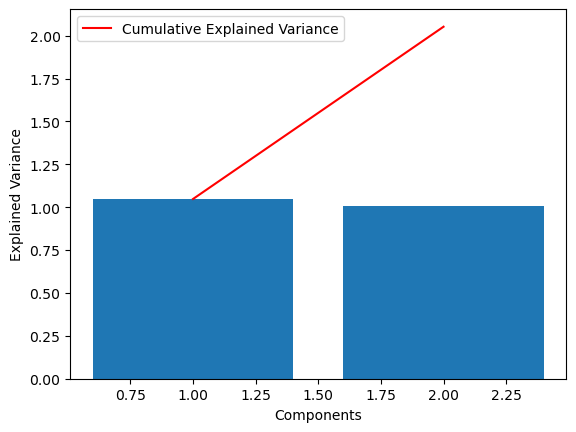

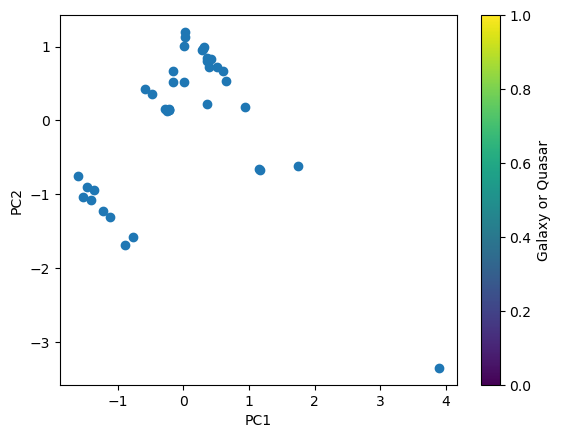

In [23]:
colormap = plt.cm.get_cmap('coolwarm')

plt.figure()
scatter = plt.scatter(X_pca1[:,0], X_pca1[:,1], cmap=colormap)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.colorbar(scatter, label="Galaxy or Quasar")
plt.show()

The goal now is to separate data in a 2xN table where N is the number of diffrent features on the table.

In [25]:
# # Function to process and reorganize data
# def reorganize_data(file_path):
#     """
#     Reads a CSV file and reorganizes it into a new table with 'Galaxy' and 'QSO' rows.
    
#     Parameters:
#         file_path (str): Path to the CSV file.
    
#     Returns:
#         pd.DataFrame: A new DataFrame with 'Galaxy' and 'QSO' rows.
#     """
#     # Read the CSV file into a pandas DataFrame
#     df = pd.read_csv(file_path)
    
#     # Assuming the .csv file has a column named 'Type' that specifies 'Galaxy' or 'QSO'
#     # and the other columns contain the data points
#     if 'SOURCETYPE' not in df.columns:
#         raise ValueError("The CSV file must contain a 'SOURCETYPE' column specifying 'Galaxy' or 'QSO'.")
    
#     # Group data by 'Type' (Galaxy or QSO) and aggregate values into lists
#     new_table = df.groupby('SOURCETYPE').agg(lambda x: x.tolist())

#     # Optionally reindex to ensure Galaxy and QSO rows are present, even if one is missing
# #     new_table = new_table.reindex(['Galaxy', 'QSO'], fill_value=[])
#     return new_table

# # Example usage
# if __name__ == "__main__":
#     # Replace 'your_file.csv' with the path to your CSV file
#     file_path = 'spectral_data.csv'
    
#     try:
#         # Reorganize the data
#         df = reorganize_data(file_path)
#         # Print the new table
# #         print("Reorganized DataFrame:")
        
#     except Exception as e:
#         print(f"Error: {e}")

In [26]:
df

,specobjid,SOURCETYPE,field,z,g sn,r sn,i sn,red shift,red shift error,central wavelength
0,300633718924535808,GALAXY,40,0.045786,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
1,300637017459419136,GALAXY,40,0.074574,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
2,300657083546626048,GALAXY,38,0.094445,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
3,300658183058253824,GALAXY,37,0.150916,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
4,300663405738485760,GALAXY,186,0.145771,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
5,300670277686159360,GALAXY,183,0.080205,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
6,300688419628017664,GALAXY,181,0.317404,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
7,300710684738480128,QSO,27,2.243463,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
8,300710959616387072,GALAXY,207,0.030389,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791
9,300720030587316224,GALAXY,30,0.080721,20.5176,21.5656,19.5308,0.312472,0.487046,3.5791


In [27]:
df.columns

Index(['specobjid', 'SOURCETYPE', 'field', 'z', 'g sn', 'r sn', 'i sn',
       'red shift', 'red shift error', 'central wavelength'],
      dtype='object')

## Lets start PCA now:

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler=StandardScaler()
scaler.fit(new_table)

NameError: name 'new_table' is not defined

## From PCA Jupyter Tutorial

In [ ]:
# 3rd party
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from astropy.utils.data import download_file  #import file from URL
%matplotlib inline

from astroquery.vizier import Vizier
from astropy import units as u
from astropy.coordinates import SkyCoord

# from astroquery.sdss import SDSS
# from astropy import coordinates as coords

## Query: 

In [ ]:
tra = 63.05966346231679 
tdec = 15.243781569238761

vquery = Vizier(columns=['**'], row_limit=-1)
center = SkyCoord(tra * u.deg, tdec * u.deg)
catalog = vquery.query_region(center, radius='0d15m0s', catalog='I/329/urat1')[0]

print(catalog)

In [ ]:
rmag = catalog['rmag']
rmagerr = catalog['e_rmag']
catalog_coords = SkyCoord(ra=catalog['RAICRS'], dec=catalog['DEICRS'])
